# Equativ Technical test
## Context

The goal is to perform a simple binary prediction: "will the customer reply to the bid or not". We are provided with a tabular dataset for this purpose.
This is the most traditional setting for a datascience test.
Since the purpose of this exercise seems to be testing basic data skills, I won't dive into software enginereing good practices such as Object Oriented Programming


The process for such a problem is well known and as follows:

- Data Exploration
- Data Preprocessing
- Model fitting and fine-tuning
- Model Prediction
- Notes for further steps

## Data Exploration

Let us read the data and analyse it briefly

In [39]:
import pandas as pd
data = pd.read_csv("dataset_21112023.csv")

pd.set_option('display.max_columns', 39)
data

,buyer_A,buyer_B,context_A,context_B,context_C,context_D,context_E,context_F,context_G,context_H,context_I,context_J,context_K,context_L,context_M,context_N,context_O,context_P,context_Q,context_R,context_S,context_T,context_U,context_V,context_W,context_X,context_Y,context_Z,context_ZA,user_A,user_B,user_C,user_D,user_E,user_F,user_G,user_H,user_I,is_revenue_opportunity
0,0,21,6,8.0,2,NaN,2,-5.819913e+18,0.246477,674.0,0,0,0,4,NaN,3484.0,1,0,1,0,13206.0,NaN,NaN,58.0,NaN,NaN,5,NaN,NaN,NaN,0,13.0,6,NaN,2,345.0,NaN,1,True
1,1,21,1,NaN,2,8940.0,2,-3.346706e+18,0.157150,NaN,0,0,0,4,NaN,NaN,1,0,1,1,NaN,277.0,372.0,NaN,44.0,NaN,5,NaN,NaN,122.0,1,61.0,6,38.0,3,221.0,NaN,1,False
2,0,8,6,281.0,2,NaN,2,7.056387e+18,0.215925,NaN,2,1,0,2,NaN,NaN,1,0,1,1,NaN,73.0,260.0,NaN,49.0,57.0,10,1109.0,689.0,NaN,0,NaN,6,NaN,3,251.0,NaN,1,False
3,1,48,2,351.0,2,NaN,2,3.641237e+18,0.246989,188.0,0,0,0,4,NaN,1991.0,1,0,1,0,4049.0,NaN,NaN,58.0,NaN,NaN,5,NaN,NaN,122.0,0,0.0,6,66.0,1,213.0,137.0,2,False
4,0,21,3,618.0,0,7728.0,2,2.326909e+18,0.237902,NaN,2,0,0,4,NaN,NaN,1,0,1,1,NaN,304.0,80.0,NaN,49.0,NaN,5,NaN,NaN,NaN,0,NaN,1,12.0,3,NaN,74.0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,21,6,793.0,1,NaN,3,NaN,0.361286,NaN,2,0,1,0,7.536078e+18,NaN,1,1,1,1,NaN,667.0,487.0,NaN,24.0,24.0,3,428.0,184.0,NaN,1,41.0,6,NaN,3,251.0,NaN,1,True
999996,1,21,1,793.0,1,7342.0,3,NaN,0.657575,NaN,0,0,1,4,7.536078e+18,NaN,1,1,1,1,NaN,327.0,199.0,NaN,24.0,NaN,5,NaN,NaN,127.0,1,64.0,6,NaN,3,132.0,230.0,1,True
999997,1,23,3,474.0,1,NaN,2,NaN,0.337396,1652.0,0,0,1,4,-6.535230e+18,3165.0,1,0,1,0,3937.0,NaN,NaN,107.0,NaN,NaN,5,NaN,NaN,122.0,0,61.0,6,12.0,1,176.0,NaN,2,True
999998,0,0,4,618.0,0,9890.0,2,-3.166980e+18,0.743743,NaN,2,0,0,4,NaN,NaN,1,0,1,1,NaN,304.0,849.0,NaN,49.0,NaN,5,NaN,NaN,NaN,0,NaN,1,NaN,3,NaN,74.0,1,True


The goal is to build a model before the ad is sent to the DSP. At this stage we do possess information about the user, the context (the website), and the potential DSP. Therefore it does seem that we can use all variables for the problem statement.

### Categoricality

Let us map quickly the variables that are not categorical

**Boolean**
- buyer_A (represented by 0 or 1)
- context_k o p q r (represented by 0 or 1)
- user_b

**float**
- context_g

Basically almost everything is categorical. This automatically is not in favour most linear models as a proper encoding (like OH) implies the creation of many variables. It directs us towards trees and probably a good amount of preprocessing (because if some values appears almost never they may have either a ridiculous or huge statistical value).

before we study it further

### Target Imbalance

Let us check the target value and see if it is imbalanced (and therefore if corresponding techniques should be applied when sampling in the training or at training time in the loss function and sampling)

In [41]:
print(data[data["is_revenue_opportunity"] == True].shape[0] / data.shape[0])
data["is_revenue_opportunity"].value_counts()

0.501096


is_revenue_opportunity
True     501096
False    498904
Name: count, dtype: int64

So the dataset seems rather balanced!

Let us go back to categorical values and check the percentage of null values for each variable. There seems to be a high number of these, and this also automatically discards linear models use out of the box (because they don't handle it, it means I would need to discard training data or find a way to replace values). Tree-based methods can handle it as a special case.

In [42]:
counting_nonnull_rate = (data.describe().loc["count", :] / data.shape[0]).sort_values()
counting_nonnull_rate

context_X     0.177852
context_Z     0.177852
context_ZA    0.177852
user_A        0.238996
context_V     0.273899
context_N     0.273909
context_M     0.282778
context_H     0.366960
context_S     0.369413
context_D     0.451863
user_E        0.621802
context_U     0.651172
context_T     0.651172
user_H        0.684983
context_W     0.726091
context_F     0.738118
user_G        0.770235
user_C        0.795530
context_B     0.889993
user_B        1.000000
user_F        1.000000
context_Y     1.000000
user_D        1.000000
buyer_A       1.000000
context_Q     1.000000
context_P     1.000000
context_O     1.000000
context_L     1.000000
context_K     1.000000
context_J     1.000000
context_I     1.000000
context_G     1.000000
context_E     1.000000
context_C     1.000000
context_A     1.000000
buyer_B       1.000000
context_R     1.000000
user_I        1.000000
Name: count, dtype: float64

It means that 14 columns out of the 39 have > 30% missing values. Let us see for each of them if the rare non-null values are well correlated with the target value

In [43]:
near_empty_columns = list(counting_nonnull_rate[counting_nonnull_rate < .7].index)
columns_kept = []
for column in near_empty_columns:
    X = data[[column, "is_revenue_opportunity"]]

    # Testing hypothesis
    b1 = X[~X[column].isna()].is_revenue_opportunity.value_counts().min() / X[~X[column].isna()].shape[0] < .37
    b2 = X[X[column].isna()].is_revenue_opportunity.value_counts().min() / X[X[column].isna()].shape[0] < .37
    print(column, b1, b2)

    if b1 or b2:
        columns_kept += [column]
    
columns_kept

context_X True False
context_Z True False
context_ZA True False
user_A False False
context_V False False
context_N False False
context_M False False
context_H False False
context_S False False
context_D False False
user_E False False
context_U False False
context_T False False
user_H False False


['context_X', 'context_Z', 'context_ZA']

In [44]:
selected_columns = (set(data.columns) - set(near_empty_columns)).union(set(columns_kept))
selected_columns = list(selected_columns)
selected_columns

['context_ZA',
 'context_O',
 'context_R',
 'context_C',
 'user_C',
 'user_D',
 'context_Y',
 'context_A',
 'context_K',
 'context_B',
 'user_G',
 'buyer_A',
 'context_P',
 'user_B',
 'user_F',
 'context_E',
 'user_I',
 'context_Z',
 'context_X',
 'context_I',
 'is_revenue_opportunity',
 'buyer_B',
 'context_W',
 'context_Q',
 'context_F',
 'context_L',
 'context_G',
 'context_J']

### Eliminating highly correlated features
So at this stage we've eliminated some columns. Let us continue and check for correlation among categorical features and see which are most informative and which seem uninformative.
Correlation is usually defined only for numerical values... Hence we will use an alternative definittion as explained in [this article](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9).
Basically we will use:
- Cramer's V metric to compute a correlation-like score for categorical-categorical variable comparison
- a correlation ratio for a categorical-continuous variable comparison

NB: we will also be able here use a tree-based model and after checking for performance (simple accuracy should do given the balanced dataset), we'll check the feature importance feature

########## PLEASE EXECUTE THE LAST CELL OF THIS NOTEBOOK AT THIS POINT ################

C:\Users\benja\AppData\Local\Temp\ipykernel_23984\2449010387.py:788: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\benja\AppData\Local\Temp\ipykernel_23984\2449010387.py:789: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
C:\Users\benja\AppData\Local\Temp\ipykernel_23984\2449010387.py:963: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sv.loc[c, :] = " "
c:\Users\benja\anaconda3\envs\

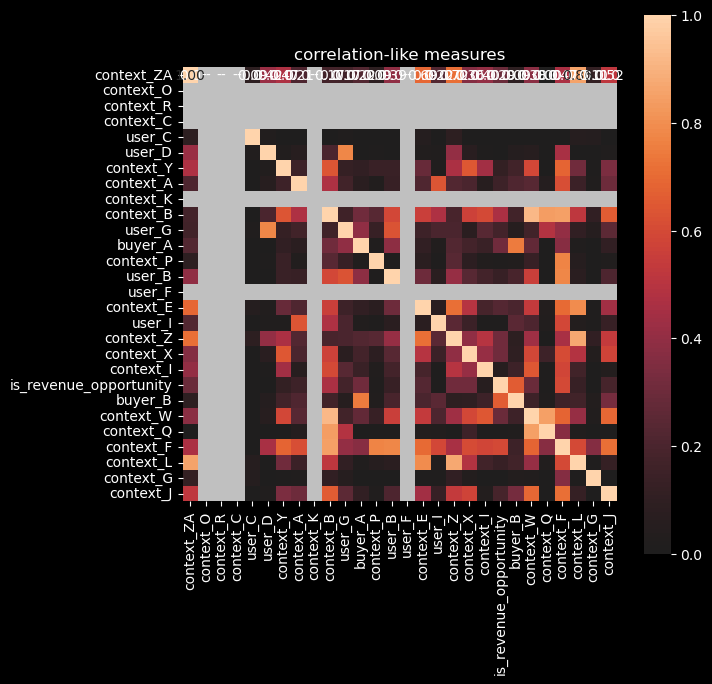

In [45]:
# **Boolean**
# - buyer_A (represented by 0 or 1)
# - context_k o p q r (represented by 0 or 1)
# - user_b

# **float**
# - context_g

# Note: this is using the large piece of code taken from the link mentioned
# in the comments and in the last cell of this notebook.
nominal_columns = [x for x in selected_columns if x != "context_G"]
numerical_columns = ["context_G"]

# First let us ignore NaN values (instead of considering them to be a category in and out of itself)
correlations = associations(
    dataset=data[selected_columns],
    nominal_columns=nominal_columns,
    numerical_columns=numerical_columns,
    figsize=(7, 7),
    title="correlation-like measures",
    multiprocessing=False, # does not work for me
    max_cpu_cores=6,
    nan_strategy="drop_samples", #tried with replace as well
    nan_replace_value="999999",
)["corr"]

In [46]:
# Let us have a look at variables with more than 1% correlation with the output variable
min_correlation_condition = correlations.loc["is_revenue_opportunity", :] > 0.01

# Let us sort them by order of descending correlation
relevant_selected_features = (
    correlations.loc["is_revenue_opportunity", min_correlation_condition]
    .drop(labels=["is_revenue_opportunity"])
    .sort_values(ascending=False)
)
relevant_selected_features

buyer_B       0.657501
context_F     0.599681
context_B     0.463649
context_Z     0.310265
context_X     0.308733
buyer_A       0.304940
context_W     0.293447
context_ZA    0.292259
context_E     0.234005
context_J     0.183521
user_G        0.177412
context_A     0.153526
context_L     0.132216
user_B        0.131850
context_Y     0.116708
context_I     0.061677
context_P     0.017460
Name: is_revenue_opportunity, dtype: float64

In [47]:
# Out of these features, which are highly correlated? 
for feature in relevant_selected_features.index:
    cnd = (correlations.loc[feature, : ] > .8)
    corr_features = correlations.loc[feature, cnd].drop(labels=[feature]).sort_values(ascending=False)
    if corr_features.shape[0] > 0:
        print(corr_features, "\n")

context_B    0.844705
Name: context_F, dtype: float64 

context_W    0.918358
context_F    0.844705
context_Q    0.843575
Name: context_B, dtype: float64 

context_L    0.869749
Name: context_Z, dtype: float64 

context_B    0.918358
context_Q    0.849437
Name: context_W, dtype: float64 

context_L    0.855674
Name: context_ZA, dtype: float64 

context_Z     0.869749
context_ZA    0.855674
Name: context_L, dtype: float64 



Here are the conclusions we can seemingly draw from this plot and measures:

#### Without NaN values
- context_W and context_R are basically the same variable: it can actually be verified easily with `data[["context_W", "context_R"]].iloc[100:120,:]` basically context_R == 0 <=> context_W.isna(). As a consequence we will **discard context_R**. Similarly context_R is super correlated with user_F
- context_W and context_B are also super correlated, when ignoring NaN values... However, there seems to be a lot of NaN values for both... Twice as many for context_W. Maybe it makes more sense to discard context_W... There seems to be a stronger correlation with the target variable when looking only at context_B. Let us keep this one only and **discard context_W**
- context_L and context_Z are also super related, let us keep the one with highest correlation to target_value: let us **discard context_L**
- context_Q and context_B are also highly correlated... Let us **discard context_Q** as the least informative of the 2

With this, we have discarded most redundant features. Let us rerun the algorithm, now taking NaNs into account see if it brings new information around.

C:\Users\benja\AppData\Local\Temp\ipykernel_23984\2449010387.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '999999' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.fillna(nan_replace_value, inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_23984\2449010387.py:788: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\benja\AppData\Local\Temp\ipykernel_23984\2449010387.py:789: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(

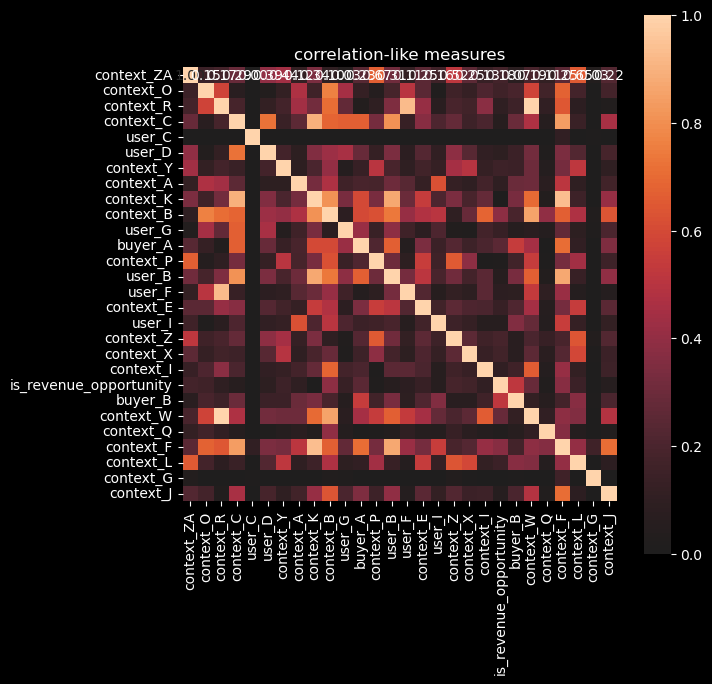

In [48]:
# First let us ignore NaN values (instead of considering them to be a category in and out of itself)
correlations = associations(
    dataset=data[selected_columns],
    nominal_columns=nominal_columns,
    numerical_columns=numerical_columns,
    figsize=(7, 7),
    title="correlation-like measures",
    multiprocessing=False, # does not work for me
    max_cpu_cores=6,
    nan_strategy="replace", #tried with replace as well
    nan_replace_value="999999",
)["corr"]

In [49]:
# Let us sort them by order of descending correlation
relevant_selected_features2 = (
    correlations.loc["is_revenue_opportunity", min_correlation_condition]
    .drop(labels=["is_revenue_opportunity"])
    .sort_values(ascending=False)
)
relevant_selected_features2

buyer_B       0.523034
context_B     0.383060
context_F     0.370481
context_W     0.284382
buyer_A       0.242684
context_Z     0.184724
context_ZA    0.179065
context_X     0.166648
context_Y     0.154590
context_L     0.144661
user_G        0.131984
context_E     0.127621
context_I     0.103098
context_A     0.097562
user_B        0.055187
context_J     0.054537
context_P     0.018406
Name: is_revenue_opportunity, dtype: float64

In [50]:
# Out of these features, which are highly correlated? 
for feature in relevant_selected_features2.index:
    cnd = (correlations.loc[feature, : ] > .8)
    corr_features = correlations.loc[feature, cnd].drop(labels=[feature]).sort_values(ascending=False)
    if corr_features.shape[0] > 0:
        print(corr_features, "\n")

context_W    0.858815
context_K    0.806956
Name: context_B, dtype: float64 

context_K    0.934299
user_B       0.872466
context_C    0.839783
Name: context_F, dtype: float64 

context_R    0.999971
context_B    0.858815
Name: context_W, dtype: float64 

context_F    0.872466
context_K    0.868663
context_C    0.806844
Name: user_B, dtype: float64 



#### With NaN values

So we already removed context_RLWQ

Additional information:
- context_K and context_F are highly correlated. As a matter of fact, the following `data[(data["context_K"] == 1) & (~data["context_F"].isna())][["context_K", "context_F"]]` only raises 10 rows. Let us **discard context_K** and keep context_F that has a wider range of values.
- same thing for context_K and user_B... We can **discard user_B**.
Both decisions above are highly motivated by the idea that NaN value is an information in itself within context_F
- context_C and context_F are highly correlated `data[["context_C", "context_F"]].iloc[400:450,:]` shows that a 1 for context_C implies a NaN for context_F, but 1 and 2 variables seem to add some information and not be clearly identifiable. I'll keep them both.

So we've discarded context_RLWQK, user_B so far.

#### Last sound check for selected features

Let us however double check by fitting out a boosting algorithm with both all the features and only the selected features... See if it makes a difference.

In [51]:
assert len(list(set(relevant_selected_features.index) - set(relevant_selected_features2.index))) == 0
base_features = list(relevant_selected_features.index)
rejected_correlated_features = [f"context_{i}"for i in "R L W Q K".split()] + ["user_B"]
base_features = [f for f in base_features if f not in rejected_correlated_features]
unused_features = set(selected_columns) - set(base_features)
base_features, unused_features

(['buyer_B',
  'context_F',
  'context_B',
  'context_Z',
  'context_X',
  'buyer_A',
  'context_ZA',
  'context_E',
  'context_J',
  'user_G',
  'context_A',
  'context_Y',
  'context_I',
  'context_P'],
 {'context_C',
  'context_G',
  'context_K',
  'context_L',
  'context_O',
  'context_Q',
  'context_R',
  'context_W',
  'is_revenue_opportunity',
  'user_B',
  'user_C',
  'user_D',
  'user_F',
  'user_I'})

Based on this we could potentially add context_CGO, and user_CDFI (which were rejected originally because of their low correlation with the target variable).
Indeed, we rejected them to avoid the curse of dimensionality... But since we don't have too many variables, let the model decide whether or not to use them. It can actually help the model in edge cases.

Let us a fit a basic boosting model with base_features (14 features), then with these but adding the unused features (14+14 = 28), and finally with the whole set (38 features total), and compare base score (AUC metric)

In [52]:
dtype_conversion_dict = {feature:"category" for feature in data.columns}
dtype_conversion_dict["buyer_A"] = "bool"
dtype_conversion_dict["context_G"] = "float"
dtype_conversion_dict["context_J"] = "bool"
dtype_conversion_dict["context_K"] = "bool"
dtype_conversion_dict["context_O"] = "bool"
dtype_conversion_dict["context_P"] = "bool"
dtype_conversion_dict["context_Q"] = "bool"
dtype_conversion_dict["context_R"] = "bool"
dtype_conversion_dict["user_B"] = "bool"
data = data.astype(dtype_conversion_dict)

In [53]:
from sklearn.ensemble import (
    HistGradientBoostingClassifier,
)  # a fast boosting classifier with native support for NaN
from sklearn.model_selection import cross_val_score

scores = {"base_features": None, "extended_features": None, "all_features": None}

X = data[base_features]

# Needed if the model does not handle it natively
# Filling NaN with a new "unknown" label
# missing_label = 7777777 #"unknown"
# for feature in X.columns:
#     if X[feature].dtype.name == "category":
#         X.loc[:,feature] = X[feature].cat.add_categories([missing_label])
#         X[feature].fillna(missing_label, inplace=True)
y = data["is_revenue_opportunity"]

# NB: with the choosen model, cardinality of categories of a variable has to be <255 hence the strange condition.
# Indeed context_F is supposedly a categorical variable... But there are too many distinct values for it to be considered as such (10^4)
# Maybe extra preprocessing should be done to study it and convert it to a categorical variable
model = HistGradientBoostingClassifier(
    random_state=0,
    categorical_features=[
        True if X[column].value_counts().shape[0] < 255 else False
        for column in X.columns
    ],
    class_weight="balanced",
)
scores["base_features"] = cross_val_score(model, X, y, cv=5, scoring="roc_auc").mean()

X = data[
    base_features
    + [f"context_{i}" for i in "C G O".split()]
    + [f"user_{i}" for i in "C D F I".split()]
]
model = HistGradientBoostingClassifier(
    random_state=0,
    categorical_features=[
        True if X[column].value_counts().shape[0] < 255 else False
        for column in X.columns
    ],
    class_weight="balanced",
)
scores["extended_features"] = cross_val_score(
    model, X, y, cv=5, scoring="roc_auc"
).mean()

X = data.drop(columns=["is_revenue_opportunity"]).copy()
model = HistGradientBoostingClassifier(
    random_state=0,
    categorical_features=[
        True if X[column].value_counts().shape[0] < 255 else False
        for column in X.columns
    ],
    class_weight="balanced",
)
scores["all_features"] = cross_val_score(model, X, y, cv=5, scoring="roc_auc").mean()

scores

{'base_features': 0.8980448398824187,
 'extended_features': 0.9009798148139666,
 'all_features': 0.9197013818342494}

As a conclusion... We reach an AUC of .9 with just 14 features... But keeping more data (including almost identical variables), we can still reach the mesmerizing score of .92
Since this result is a 5-fold cross-validated result, it is quite trustworthy and overfit-proof.

In [ ]:
from sklearn.inspection import permutation_importance
model.fit(X,y)
r = permutation_importance(model, X, y, n_repeats=10, random_state=0, scoring="roc_auc", n_jobs=6)
r

## Model fit and fine-tuning

Since we are dealing with categorical data, we don't particularly need to standardize the dataset.


In [54]:
from sklearn.model_selection import GridSearchCV

X = data[base_features]
clf = GridSearchCV(
    estimator=HistGradientBoostingClassifier(
        random_state=0,
        categorical_features=[
            True if X[column].value_counts().shape[0] < 255 else False
            for column in X.columns
        ],
        class_weight="balanced",
    ),
    param_grid={
        "max_iter": [100, 300],
        "max_leaf_nodes": [21, 31, 41],
        "max_depth": [None, 5],
    },
    scoring="roc_auc",
)
clf.fit(data[base_features], y)
results = pd.DataFrame(clf.cv_results_)

In [55]:
results[["rank_test_score", "mean_test_score", "params"]].sort_values(by=["rank_test_score"])

,rank_test_score,mean_test_score,params
5,1,0.919611,"{'max_depth': None, 'max_iter': 300, 'max_leaf..."
4,2,0.916139,"{'max_depth': None, 'max_iter': 300, 'max_leaf..."
10,3,0.910336,"{'max_depth': 5, 'max_iter': 300, 'max_leaf_no..."
11,4,0.910305,"{'max_depth': 5, 'max_iter': 300, 'max_leaf_no..."
3,5,0.910237,"{'max_depth': None, 'max_iter': 300, 'max_leaf..."
9,6,0.906959,"{'max_depth': 5, 'max_iter': 300, 'max_leaf_no..."
2,7,0.903123,"{'max_depth': None, 'max_iter': 100, 'max_leaf..."
1,8,0.898045,"{'max_depth': None, 'max_iter': 100, 'max_leaf..."
0,9,0.890541,"{'max_depth': None, 'max_iter': 100, 'max_leaf..."
8,10,0.888652,"{'max_depth': 5, 'max_iter': 100, 'max_leaf_no..."


We were able to push the 14-feature model to .92 AUC

## Model Prediction

Let us pick the best model from above, fit it on the whole training dataset, then return prediction on the test set.

We will first use the ROC curve to find the best cutoff point. This [kaggle challenge notebook](https://www.kaggle.com/code/nicholasgah/obtain-optimal-probability-threshold-using-roc) explains how to use Youden's J statistic as a definition for such an optimum

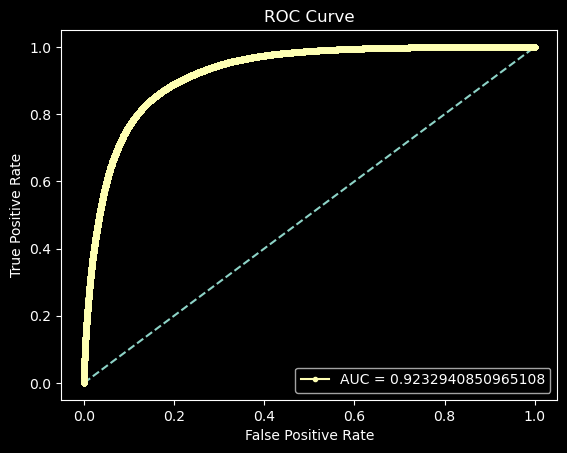

In [70]:
# Quickly trying to find the best cutoff threhsold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Fit the best model on the full dataset
estimator = clf.best_estimator_
estimator.fit(X,y)
y_hat = estimator.predict_proba(X)[:,-1]

# Plot ROC curve on the training set
false_pos_rate, true_pos_rate, proba = roc_curve(y, y_hat)
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y, y_hat)}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [71]:
import numpy as np

# Find optimal cutoff using J statistic
optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
optimal_proba_cutoff

0.5198923505086844

In [72]:
test_data = pd.read_csv("test_dataset_2023-11-22.csv")
X_test = test_data[base_features]
y_hat_test = np.array([1 if i>= optimal_proba_cutoff else 0 for i in estimator.predict_proba(X_test)[:, -1]])

In [73]:
(y_hat_test == 1).sum(), (y_hat_test == 0).sum(), y_hat_test.shape  #we do obtain a vast majority of 0 in the testing set.

(3034, 96966, (100000,))

In [75]:
pd.DataFrame(y_hat_test).to_csv("y_hat_test.csv", index=False)

## Further notes

What could be improved:
- Analysing variables and converting them to "true" categorical features when it makes sense
- optimizing for another metric than AUC since we may want to favor specificity for example over accuracy (better business assessment).
- Further fine-tuning of the model, and trying other models
- If it is costly to collect features, then use correlation analysis to collect less data in production.


In [78]:
!conda env export > environment.yml

In [76]:
# adapting environment above to show just selected packages
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'matplotlib',
 'pandas',
 'concurrent.futures',
 'math',
 'warnings',
 'matplotlib.pyplot',
 'numpy',
 'scipy.cluster.hierarchy',
 'scipy.stats',
 'seaborn',
 'types']

# TO BE EXECUTED AT THE BEGINNING (or where mentioned above)
(code for correlation analysis with categorical features)
source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [40]:
import concurrent.futures as cf
import math
import warnings
from itertools import repeat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy.stats as ss
import seaborn as sns
from psutil import cpu_count
import numpy as np
from collections import Counter
import scipy.stats as ss

_REPLACE = "replace"
_DROP = "drop"
_DEFAULT_REPLACE_VALUE = 0.0
IS_JUPYTER = True

def convert(data, to, copy=True):
    converted = None
    if to == "array":
        if isinstance(data, np.ndarray):
            converted = data.copy() if copy else data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.values()
    elif to == "list":
        if isinstance(data, list):
            converted = data.copy() if copy else data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == "dataframe":
        if isinstance(data, pd.DataFrame):
            converted = data.copy(deep=True) if copy else data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError(
            "cannot handle data conversion of type: {} to {}".format(
                type(data), to
            )
        )
    else:
        return converted

def plot_or_not(plot):
    if plot:
        plt.show()
    elif not plot and IS_JUPYTER:
        plt.close()


def remove_incomplete_samples(x, y):
    x = [v if v is not None else np.nan for v in x]
    y = [v if v is not None else np.nan for v in y]
    arr = np.array([x, y]).transpose()
    arr = arr[~np.isnan(arr).any(axis=1)].transpose()
    if isinstance(x, list):
        return arr[0].tolist(), arr[1].tolist()
    else:
        return arr[0], arr[1]


def replace_nan_with_value(x, y, value):
    x = np.array([v if v == v and v is not None else value for v in x])  # NaN != NaN
    y = np.array([v if v == v and v is not None else value for v in y])
    return x, y

def identify_columns_by_type(dataset, include):
    """
    Given a dataset, identify columns of the types requested.

    Parameters:
    -----------
    dataset : NumPy ndarray / Pandas DataFrame
    include : list of strings
        Desired column types

    Returns:
    --------
    A list of columns names

    Example:
    --------
    >>> df = pd.DataFrame({'col1': ['a', 'b', 'c', 'a'], 'col2': [3, 4, 2, 1], 'col3': [1., 2., 3., 4.]})
    >>> identify_columns_by_type(df, include=['int64', 'float64'])
    ['col2', 'col3']

    """
    dataset = convert(dataset, "dataframe")
    columns = list(dataset.select_dtypes(include=include).columns)
    return columns

__all__ = [
    "associations",
    "cluster_correlations",
    "conditional_entropy",
    "correlation_ratio",
    "cramers_v",
    "identify_nominal_columns",
    "identify_numeric_columns",
    "numerical_encoding",
    "replot_last_associations",
    "theils_u",
]

_REPLACE = "replace"
_DROP = "drop"
_DROP_SAMPLES = "drop_samples"
_DROP_FEATURES = "drop_features"
_DROP_SAMPLE_PAIRS = "drop_sample_pairs"
_SKIP = "skip"
_DEFAULT_REPLACE_VALUE = 0.0
_PRECISION = 1e-13

_ASSOC_PLOT_PARAMS = dict()

_NO_OP = "no-op"
_SINGLE_VALUE_COLUMN_OP = "single-value-column-op"
_I_EQ_J_OP = "i-equal-j-op"
_ASSOC_OP = "assoc-op"


def _inf_nan_str(x):
    if np.isnan(x):
        return "NaN"
    elif abs(x) == np.inf:
        return "inf"
    else:
        return ""


def conditional_entropy(
    x,
    y,
    nan_strategy=_REPLACE,
    nan_replace_value=_DEFAULT_REPLACE_VALUE,
    log_base: float = math.e,
):
    """
    Calculates the conditional entropy of x given y: S(x|y)

    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy

    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    log_base: float, default = e
        specifying base for calculating entropy. Default is base e.

    Returns:
    --------
    float
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy


def cramers_v(
    x,
    y,
    bias_correction=True,
    nan_strategy=_REPLACE,
    nan_replace_value=_DEFAULT_REPLACE_VALUE,
):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    This is a symmetric coefficient: V(x,y) = V(y,x)

    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    bias_correction : Boolean, default = True
        Use bias correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328.
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.

    Returns:
    --------
    float in the range of [0,1]
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    if bias_correction:
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        rcorr = r - ((r - 1) ** 2) / (n - 1)
        kcorr = k - ((k - 1) ** 2) / (n - 1)
        if min((kcorr - 1), (rcorr - 1)) == 0:
            warnings.warn(
                "Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)",
                RuntimeWarning,
            )
            return np.nan
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    else:
        v = np.sqrt(phi2 / min(k - 1, r - 1))
    if -_PRECISION <= v < 0.0 or 1.0 < v <= 1.0 + _PRECISION:
        rounded_v = 0.0 if v < 0 else 1.0
        warnings.warn(
            f"Rounded V = {v} to {rounded_v}. This is probably due to floating point precision issues.",
            RuntimeWarning,
        )
        return rounded_v
    else:
        return v


def theils_u(
    x, y, nan_strategy=_REPLACE, nan_replace_value=_DEFAULT_REPLACE_VALUE
):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.

    This is an asymmetric coefficient: U(x,y) != U(y,x)

    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient

    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.

    Returns:
    --------
    float in the range of [0,1]
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1.0
    else:
        u = (s_x - s_xy) / s_x
        if -_PRECISION <= u < 0.0 or 1.0 < u <= 1.0 + _PRECISION:
            rounded_u = 0.0 if u < 0 else 1.0
            warnings.warn(
                f"Rounded U = {u} to {rounded_u}. This is probably due to floating point precision issues.",
                RuntimeWarning,
            )
            return rounded_u
        else:
            return u


def correlation_ratio(
    categories,
    measurements,
    nan_strategy=_REPLACE,
    nan_replace_value=_DEFAULT_REPLACE_VALUE,
):
    """
    Calculates the Correlation Ratio (sometimes marked by the greek letter Eta)
    for categorical-continuous association.

    Answers the question - given a continuous value of a measurement, is it
    possible to know which category is it associated with?

    Value is in the range [0,1], where 0 means a category cannot be determined
    by a continuous measurement, and 1 means a category can be determined with
    absolute certainty.

    Wikipedia: https://en.wikipedia.org/wiki/Correlation_ratio

    Parameters:
    -----------
    categories : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    measurements : list / NumPy ndarray / Pandas Series
        A sequence of continuous measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.

    Returns:
    --------
    float in the range of [0,1]
    """
    if nan_strategy == _REPLACE:
        categories, measurements = replace_nan_with_value(
            categories, measurements, nan_replace_value
        )
    elif nan_strategy == _DROP:
        categories, measurements = remove_incomplete_samples(
            categories, measurements
        )
    categories = convert(categories, "array")
    measurements = convert(measurements, "array")
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2))
    )
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        return 0.0
    else:
        eta = np.sqrt(numerator / denominator)
        if 1.0 < eta <= 1.0 + _PRECISION:
            warnings.warn(
                f"Rounded eta = {eta} to 1. This is probably due to floating point precision issues.",
                RuntimeWarning,
            )
            return 1.0
        else:
            return eta


def identify_nominal_columns(dataset):
    """
    Given a dataset, identify categorical columns.

    Parameters:
    -----------
    dataset : NumPy ndarray / Pandas DataFrame

    Returns:
    --------
    A list of categorical columns names

    Example:
    --------
    >>> df = pd.DataFrame({'col1': ['a', 'b', 'c', 'a'], 'col2': [3, 4, 2, 1]})
    >>> identify_nominal_columns(df)
    ['col1']

    """
    return identify_columns_by_type(dataset, include=["object", "category"])


def identify_numeric_columns(dataset):
    """
    Given a dataset, identify numeric columns.

    Parameters:
    -----------
    dataset : NumPy ndarray / Pandas DataFrame

    Returns:
    --------
    A list of numerical columns names

    Example:
    --------
    >>> df = pd.DataFrame({'col1': ['a', 'b', 'c', 'a'], 'col2': [3, 4, 2, 1], 'col3': [1., 2., 3., 4.]})
    >>> identify_numeric_columns(df)
    ['col2', 'col3']

    """
    return identify_columns_by_type(dataset, include=["int64", "float64"])


def associations(
    dataset,
    nominal_columns="auto",
    numerical_columns=None,
    mark_columns=False,
    nom_nom_assoc="cramer",
    num_num_assoc="pearson",
    nom_num_assoc="correlation_ratio",
    symmetric_nom_nom=True,
    symmetric_num_num=True,
    display_rows="all",
    display_columns="all",
    hide_rows=None,
    hide_columns=None,
    cramers_v_bias_correction=True,
    nan_strategy=_REPLACE,
    nan_replace_value=_DEFAULT_REPLACE_VALUE,
    ax=None,
    figsize=None,
    annot=True,
    fmt=".2f",
    cmap=None,
    sv_color="silver",
    cbar=True,
    vmax=1.0,
    vmin=None,
    plot=True,
    compute_only=False,
    clustering=False,
    title=None,
    filename=None,
    multiprocessing=False,
    max_cpu_cores=None,
):
    """
    Calculate the correlation/strength-of-association of features in data-set
    with both categorical and continuous features using:
     * Pearson's R for continuous-continuous cases
     * Correlation Ratio for categorical-continuous cases
     * Cramer's V or Theil's U for categorical-categorical cases

    Parameters:
    -----------
    dataset : NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    nominal_columns : string / list / NumPy ndarray, default = 'auto'
        Names of columns of the data-set which hold categorical values. Can
        also be the string 'all' to state that all columns are categorical,
        'auto' (default) to try to identify nominal columns, or None to state
        none are categorical. Only used if `numerical_columns` is `None`.
    numerical_columns : string / list / NumPy ndarray, default = None
        To be used instead of `nominal_columns`. Names of columns of the data-set
        which hold numerical values. Can also be the string 'all' to state that
        all columns are numerical (equivalent to `nominal_columns=None`) or
        'auto' to try to identify numerical columns (equivalent to
        `nominal_columns=auto`). If `None`, `nominal_columns` is used.
    mark_columns : Boolean, default = False
        if True, output's columns' names will have a suffix of '(nom)' or
        '(con)' based on their type (nominal or continuous), as provided
        by nominal_columns
    nom_nom_assoc : callable / string, default = 'cramer'
        If callable, a function which recieves two `pd.Series` and returns a single number.
        If string, name of nominal-nominal (categorical-categorical) association to use.
        Options are 'cramer' for Cramer's V or `theil` for Theil's U. If 'theil',
        heat-map columns are the provided information (U = U(row|col)).
    num_num_assoc : callable / string, default = 'pearson'
        If callable, a function which recieves two `pd.Series` and returns a single number.
        If string, name of numerical-numerical association to use. Options are 'pearson'
        for Pearson's R, 'spearman' for Spearman's R, 'kendall' for Kendall's Tau.
    nom_num_assoc : callable / string, default = 'correlation_ratio'
        If callable, a function which recieves two `pd.Series` and returns a single number.
        If string, name of nominal-numerical association to use. Options are 'correlation_ratio'
        for correlation ratio.
    symmetric_nom_nom : Boolean, default = True
        Relevant only if `nom_nom_assoc` is a callable. Declare whether the function is symmetric (f(x,y) = f(y,x)).
        If False, heat-map values should be interpreted as f(row,col)
    symmetric_num_num : Boolean, default = True
        Relevant only if `num_num_assoc` is a callable. Declare whether the function is symmetric (f(x,y) = f(y,x)).
        If False, heat-map values should be interpreted as f(row,col)
    display_rows : list / string, default = 'all'
        Choose which of the dataset's features will be displyed in the output's
        correlations table rows. If string, can either be a single feature's name or 'all'.
        Only used if `hide_rows` is `None`.
    display_columns : list / string, default = 'all'
        Choose which of the dataset's features will be displyed in the output's
        correlations table columns. If string, can either be a single feature's name or 'all'.
        Only used if `hide_columns` is `None`.
    hide_rows : list / string, default = None
        Choose which of the dataset's features will not be displyed in the output's
        correlations table rows. If string, must be a single feature's name. If `None`,
        `display_rows` is used.
    hide_columns : list / string, default = None
        Choose which of the dataset's features will not be displyed in the output's
        correlations table columns. If string, must be a single feature's name. If `None`,
        `display_columns` is used.
    cramers_v_bias_correction : Boolean, default = True
        Use bias correction for Cramer's V from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328.
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop_samples' to remove
        samples with missing values, 'drop_features' to remove features
        (columns) with missing values, 'replace' to replace all missing
        values with the nan_replace_value, or 'drop_sample_pairs' to drop each
        pair of missing observables separately before calculating the corresponding coefficient.
        Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'
    ax : matplotlib ax, default = None
        Matplotlib Axis on which the heat-map will be plotted
    figsize : (int,int) or None, default = None
        A Matplotlib figure-size tuple. If `None`, falls back to Matplotlib's
        default. Only used if `ax=None`.
    annot : Boolean, default = True
        Plot number annotations on the heat-map
    fmt : string, default = '.2f'
        String formatting of annotations
    cmap : Matplotlib colormap or None, default = None
        A colormap to be used for the heat-map. If None, falls back to Seaborn's
        heat-map default
    sv_color : string, default = 'silver'
        A Matplotlib color. The color to be used when displaying single-value
        features over the heat-map
    cbar: Boolean, default = True
        Display heat-map's color-bar
    vmax: float, default = 1.0
        Set heat-map vmax option
    vmin: float or None, default = None
        Set heat-map vmin option. If set to None, vmin will be chosen automatically
        between 0 and -1, depending on the types of associations used (-1 if Pearson's R
        is used, 0 otherwise)
    plot : Boolean, default = True
        Plot a heat-map of the correlation matrix. If False, plotting still
        happen, but the heat-map will not be displayed.
    compute_only : Boolean, default = False
        Use this flag only if you have no need of the plotting at all. This skips the entire
        plotting mechanism.
    clustering : Boolean, default = False
        If True, hierarchical clustering is applied in order to sort
        features into meaningful groups
    title : string or None, default = None
        Plotted graph title
    filename : string or None, default = None
        If not None, plot will be saved to the given file name
    multiprocessing: Boolean, default = False
        If True, use `multiprocessing` to speed up computations. If None, falls back to single core computation
    max_cpu_cores: int or None, default = None
        If not None, ProcessPoolExecutor will use the given number of CPU cores

    Returns:
    --------
    A dictionary with the following keys:
    - `corr`: A DataFrame of the correlation/strength-of-association between
    all features
    - `ax`: A Matplotlib `Axe`

    Example:
    --------
    See examples under `dython.examples`
    """
    dataset = convert(dataset, "dataframe")

    if numerical_columns is not None:
        if numerical_columns == "auto":
            nominal_columns = "auto"
        elif numerical_columns == "all":
            nominal_columns = None
        else:
            nominal_columns = [
                c for c in dataset.columns if c not in numerical_columns
            ]

    # handling NaN values in data
    if nan_strategy == _REPLACE:
        # handling pandas categorical
        dataset = _handling_category_for_nan_imputation(
            dataset, nan_replace_value
        )

        dataset.fillna(nan_replace_value, inplace=True)
    elif nan_strategy == _DROP_SAMPLES:
        dataset.dropna(axis=0, inplace=True)
    elif nan_strategy == _DROP_FEATURES:
        dataset.dropna(axis=1, inplace=True)
    elif nan_strategy == _DROP_SAMPLE_PAIRS:
        pass  # will be handled pair-by-pair during calculations
    else:
        raise ValueError(
            "Argument nan_stragety [{:s}] is not a valid choice.".format(
                nan_strategy
            )
        )

    # identifying categorical columns
    columns = dataset.columns
    auto_nominal = False
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == "all":
        nominal_columns = columns
    elif nominal_columns == "auto":
        auto_nominal = True
        nominal_columns = identify_nominal_columns(dataset)

    # selecting rows and columns to be displayed
    if hide_rows is not None:
        if isinstance(hide_rows, str) or isinstance(hide_rows, int):
            hide_rows = [hide_rows]
        display_rows = [c for c in dataset.columns if c not in hide_rows]
    else:
        if display_rows == "all":
            display_rows = columns
        elif isinstance(display_rows, str) or isinstance(display_rows, int):
            display_columns = [display_rows]

    if hide_columns is not None:
        if isinstance(hide_columns, str) or isinstance(hide_columns, int):
            hide_columns = [hide_columns]
        display_columns = [c for c in dataset.columns if c not in hide_columns]
    else:
        if display_columns == "all":
            display_columns = columns
        elif isinstance(display_columns, str) or isinstance(
            display_columns, int
        ):
            display_columns = [display_columns]

    if (
        display_rows is None
        or display_columns is None
        or len(display_rows) < 1
        or len(display_columns) < 1
    ):
        raise ValueError(
            "display_rows and display_columns must have at least one element"
        )
    displayed_features_set = set.union(set(display_rows), set(display_columns))

    # convert timestamp columns to numerical columns, so correlation can be performed
    datetime_dtypes = [
        str(x) for x in dataset.dtypes if str(x).startswith("datetime64")
    ]  # finding all timezones
    if datetime_dtypes:
        datetime_cols = identify_columns_by_type(dataset, datetime_dtypes)
        datetime_cols = [c for c in datetime_cols if c not in nominal_columns]
        if datetime_cols:
            dataset[datetime_cols] = dataset[datetime_cols].apply(
                lambda col: col.view(np.int64), axis=0
            )
            if auto_nominal:
                nominal_columns = identify_nominal_columns(dataset)

    # will be used to store associations values
    corr = pd.DataFrame(index=columns, columns=columns, dtype=np.float64)

    # this dataframe is used to keep track of invalid association values, which will be placed on top
    # of the corr dataframe. It is done for visualization purposes, so the heatmap values will remain
    # between -1 and 1
    inf_nan = pd.DataFrame(
        data=np.zeros_like(corr), columns=columns, index=columns
    )

    # finding single-value columns
    single_value_columns_set = set()
    for c in displayed_features_set:
        if dataset[c].unique().size == 1:
            single_value_columns_set.add(c)

    # find the number of physical cpu cores available
    n_cores = cpu_count(logical=False)

    # current multiprocessing implementation performs worse on 2 cores than on 1 core,
    # so we only use multiprocessing if there are more than 2 physical cores available
    if multiprocessing and n_cores > 2:
        # find out the list of cartesian products of the column indices
        number_of_columns = len(columns)
        list_of_indices_pairs_lists = [
            (i, j)
            for i in range(number_of_columns)
            for j in range(number_of_columns)
        ]

        # do not exceed 32 cores under any circumstances
        if max_cpu_cores is not None:
            max_cpu_cores = min(32, min(max_cpu_cores, n_cores))
        else:
            max_cpu_cores = min(32, n_cores)

        # submit each list of cartesian products of column indices to separate processes
        # for faster computation.
        # process 1 receives: [(0, 0), (0, 1), (0, 2), ... (0, n)]
        # process 2 receives: [(1, 0), (1, 1), (1, 2), ... (1, n)]
        # ...
        # process m receives: [(n, 0), (n, 1), (n, 2), ... (n, n)]
        # where, n = num_columns - 1
        with cf.ProcessPoolExecutor(max_workers=max_cpu_cores) as executor:
            results = executor.map(
                _compute_associations,
                list_of_indices_pairs_lists,
                repeat(dataset),
                repeat(displayed_features_set),
                repeat(single_value_columns_set),
                repeat(nominal_columns),
                repeat(symmetric_nom_nom),
                repeat(nom_nom_assoc),
                repeat(cramers_v_bias_correction),
                repeat(num_num_assoc),
                repeat(nom_num_assoc),
                repeat(symmetric_num_num),
                repeat(nan_strategy),
                chunksize=max(
                    1, len(list_of_indices_pairs_lists) // max_cpu_cores
                ),
            )
    else:
        results = []

        for i in range(0, len(columns)):
            for j in range(i, len(columns)):
                results.append(
                    _compute_associations(
                        [i, j],
                        dataset,
                        displayed_features_set,
                        single_value_columns_set,
                        nominal_columns,
                        symmetric_nom_nom,
                        nom_nom_assoc,
                        cramers_v_bias_correction,
                        num_num_assoc,
                        nom_num_assoc,
                        symmetric_num_num,
                        nan_strategy,
                    )
                )

    # fill the correlation dataframe with the results
    for result in results:
        try:
            if result[0] == _NO_OP:
                pass
            elif result[0] == _SINGLE_VALUE_COLUMN_OP:
                i = result[1]
                corr.loc[:, columns[i]] = 0.0
                corr.loc[columns[i], :] = 0.0
            elif result[0] == _I_EQ_J_OP:
                i, j = result[1:]
                corr.loc[columns[i], columns[j]] = 1.0
            else:
                # assoc_op
                i, j, ij, ji = result[1:]
                corr.loc[columns[i], columns[j]] = (
                    ij if not np.isnan(ij) and abs(ij) < np.inf else 0.0
                )
                corr.loc[columns[j], columns[i]] = (
                    ji if not np.isnan(ji) and abs(ji) < np.inf else 0.0
                )
                inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
                inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
        except Exception as exception:
            raise exception

    corr.fillna(value=np.nan, inplace=True)

    if clustering:
        corr, _ = cluster_correlations(corr)
        inf_nan = inf_nan.reindex(columns=corr.columns).reindex(
            index=corr.index
        )

        # rearrange dispalyed rows and columns according to the clustered order
        display_columns = [c for c in corr.columns if c in display_columns]
        display_rows = [c for c in corr.index if c in display_rows]

    # keep only displayed columns and rows
    corr = corr.loc[display_rows, display_columns]
    inf_nan = inf_nan.loc[display_rows, display_columns]

    if mark_columns:

        def mark(col):
            return (
                "{} (nom)".format(col)
                if col in nominal_columns
                else "{} (con)".format(col)
            )

        corr.columns = [mark(col) for col in corr.columns]
        corr.index = [mark(col) for col in corr.index]
        inf_nan.columns = corr.columns
        inf_nan.index = corr.index
        single_value_columns_set = {
            mark(col) for col in single_value_columns_set
        }
        display_rows = [mark(col) for col in display_rows]
        display_columns = [mark(col) for col in display_columns]

    if not compute_only:
        for v in [
            "corr",
            "inf_nan",
            "single_value_columns_set",
            "display_rows",
            "display_columns",
            "displayed_features_set",
            "nominal_columns",
            "figsize",
            "vmin",
            "vmax",
            "cbar",
            "cmap",
            "sv_color",
            "fmt",
            "annot",
            "title",
        ]:
            _ASSOC_PLOT_PARAMS[v] = locals()[v]
        ax = _plot_associations(ax, filename, plot, **_ASSOC_PLOT_PARAMS)
    return {"corr": corr, "ax": ax}


def replot_last_associations(
    ax=None,
    figsize=None,
    annot=None,
    fmt=None,
    cmap=None,
    sv_color=None,
    cbar=None,
    vmax=None,
    vmin=None,
    plot=True,
    title=None,
    filename=None,
):
    """
    Re-plot last computed associations heat-map. This method performs no new computations, but only allows
    to change the visual output of the last computed heat-map.

    Parameters:
    -----------
    ax : matplotlib ax, default = None
        Matplotlib Axis on which the heat-map will be plotted
    figsize : (int,int) or None, default = None
        A Matplotlib figure-size tuple. If `None`, uses the last `associations` call value.
        Only used if `ax=None`.
    annot : Boolean or None, default = None
        Plot number annotations on the heat-map. If `None`, uses the last `associations` call value.
    fmt : string, default = None
        String formatting of annotations. If `None`, uses the last `associations` call value.
    cmap : Matplotlib colormap or None, default = None
        A colormap to be used for the heat-map. If `None`, uses the last `associations` call value.
    sv_color : string, default = None
        A Matplotlib color. The color to be used when displaying single-value.
        If `None`, uses the last `associations` call value.
    cbar : Boolean or None, default = None
        Display heat-map's color-bar. If `None`, uses the last `associations` call value.
    vmax : float or None, default = None
        Set heat-map vmax option. If `None`, uses the last `associations` call value.
    vmin : float or None, default = None
        Set heat-map vmin option. If `None`, uses the last `associations` call value.
    plot : Boolean, default = True
        Plot a heat-map of the correlation matrix. If False, plotting still
        happens, but the heat-map will not be displayed.
    title : string or None, default = None
        Plotted graph title. If `None`, uses the last `associations` call value.
    filename : string or None, default = None
        If not None, plot will be saved to the given file name. Note: in order to avoid accidental file
        overwrites, the last `associations` call value is never used, and when filename is set to None,
        no writing to file occurs.

    Returns:
    --------
    A Matplotlib `Axe`
    """
    if not bool(_ASSOC_PLOT_PARAMS):
        raise RuntimeError("No associations found to replot.")
    new_vars = locals()
    new_vars.pop("filename")
    new_vars.pop("ax")
    new_vars.pop("plot")
    plot_vars = _ASSOC_PLOT_PARAMS.copy()
    for v in new_vars:
        plot_vars[v] = new_vars[v] or plot_vars[v]
    return _plot_associations(ax, filename, plot, **plot_vars)


def _plot_associations(
    ax,
    filename,
    plot,
    corr,
    inf_nan,
    single_value_columns_set,
    display_rows,
    display_columns,
    displayed_features_set,
    nominal_columns,
    figsize,
    vmin,
    vmax,
    cbar,
    cmap,
    sv_color,
    fmt,
    annot,
    title,
):
    if ax is None:
        plt.figure(figsize=figsize)
    if inf_nan.any(axis=None):
        inf_nan_mask = np.vectorize(lambda x: not bool(x))(inf_nan.values)
        ax = sns.heatmap(
            inf_nan_mask,
            cmap=["white"],
            annot=inf_nan if annot else None,
            fmt="",
            center=0,
            square=True,
            ax=ax,
            mask=inf_nan_mask,
            cbar=False,
        )
    else:
        inf_nan_mask = np.ones_like(corr)
    if len(single_value_columns_set) > 0:
        sv = pd.DataFrame(
            data=np.zeros_like(corr), columns=corr.columns, index=corr.index
        )
        for c in single_value_columns_set:
            if c in display_rows and c in display_columns:
                sv.loc[:, c] = " "
                sv.loc[c, :] = " "
                sv.loc[c, c] = "SV"
            elif c in display_rows:
                sv.loc[c, :] = " "
                sv.loc[c, sv.columns[0]] = "SV"
            else:  # c in display_columns
                sv.loc[:, c] = " "
                sv.loc[sv.index[-1], c] = "SV"
        sv_mask = np.vectorize(lambda x: not bool(x))(sv.values)
        ax = sns.heatmap(
            sv_mask,
            cmap=[sv_color],
            annot=sv if annot else None,
            fmt="",
            center=0,
            square=True,
            ax=ax,
            mask=sv_mask,
            cbar=False,
        )
    else:
        sv_mask = np.ones_like(corr)
    mask = np.vectorize(lambda x: not bool(x))(inf_nan_mask) + np.vectorize(
        lambda x: not bool(x)
    )(sv_mask)
    vmin = vmin or (
        -1.0 if len(displayed_features_set) - len(nominal_columns) >= 2 else 0.0
    )
    ax = sns.heatmap(
        corr,
        cmap=cmap,
        annot=annot,
        fmt=fmt,
        center=0,
        vmax=vmax,
        vmin=vmin,
        square=True,
        mask=mask,
        ax=ax,
        cbar=cbar,
    )
    plt.title(title)
    if filename:
        plt.savefig(filename)
    plot_or_not(plot)
    return ax


def _handling_category_for_nan_imputation(dataset, nan_replace_value):
    pd_categorical_columns = identify_columns_by_type(
        dataset, include=["category"]
    )
    if pd_categorical_columns:
        for col in pd_categorical_columns:
            if isinstance(nan_replace_value, pd.DataFrame):
                values_ = nan_replace_value[col].unique().tolist()
                values = [
                    x for x in values_ if x not in dataset[col].cat.categories
                ]
                dataset[col] = dataset[col].cat.add_categories(values)
            else:
                if isinstance(nan_replace_value, dict):
                    value = nan_replace_value[col]
                else:
                    value = nan_replace_value
                if not value in dataset[col].cat.categories:
                    dataset[col] = dataset[col].cat.add_categories(value)
    return dataset


def _nom_num(nom_column, num_column, nom_num_assoc):
    """
    Computes the nominal-numerical association value.
    """
    if callable(nom_num_assoc):
        cell = nom_num_assoc(nom_column, num_column)
        ij = cell
        ji = cell
    elif nom_num_assoc == "correlation_ratio":
        cell = correlation_ratio(nom_column, num_column, nan_strategy=_SKIP)
        ij = cell
        ji = cell
    else:
        raise ValueError(
            f"{nom_num_assoc} is not a supported nominal-numerical association"
        )
    return ij, ji


def _compute_associations(
    indices_pair,
    dataset,
    displayed_features_set,
    single_value_columns_set,
    nominal_columns,
    symmetric_nom_nom,
    nom_nom_assoc,
    cramers_v_bias_correction,
    num_num_assoc,
    nom_num_assoc,
    symmetric_num_num,
    nan_strategy,
):
    """
    Helper function of associations.

    Parameters:
    -----------
    indices_pair: Tuple[int, int]
        The tuple of indices pairs (i, j)
    dataset: pandas.Dataframe
        the pandas dataframe
    displayed_features_set: Set[str]
        The set of { display_rows } ∪ { display_columns }
    single_value_columns_set: Set[str]
        The set of single-value columns
    nominal_columns : string / list / NumPy ndarray, default = 'auto'
        Names of columns of the data-set which hold categorical values. Can
        also be the string 'all' to state that all columns are categorical,
        'auto' (default) to try to identify nominal columns, or None to state
        none are categorical. Only used if `numerical_columns` is `None`.
    symmetric_nom_nom : Boolean, default = True
        Relevant only if `nom_nom_assoc` is a callable. Declare whether the function is symmetric (f(x,y) = f(y,x)).
        If False, heat-map values should be interpreted as f(row,col)
    nom_nom_assoc : callable / string, default = 'cramer'
        If callable, a function which recieves two `pd.Series` and returns a single number.
        If string, name of nominal-nominal (categorical-categorical) association to use.
        Options are 'cramer' for Cramer's V or `theil` for Theil's U. If 'theil',
        heat-map columns are the provided information (U = U(row|col)).
    num_num_assoc : callable / string, default = 'pearson'
        If callable, a function which recieves two `pd.Series` and returns a single number.
        If string, name of numerical-numerical association to use. Options are 'pearson'
        for Pearson's R, 'spearman' for Spearman's R, 'kendall' for Kendall's Tau.
    nom_num_assoc : callable / string, default = 'correlation_ratio'
        If callable, a function which recieves two `pd.Series` and returns a single number.
        If string, name of nominal-numerical association to use. Options are 'correlation_ratio'
        for correlation ratio.
    symmetric_num_num : Boolean, default = True
        Relevant only if `num_num_assoc` is a callable. Declare whether the function is symmetric (f(x,y) = f(y,x)).
        If False, heat-map values should be interpreted as f(row,col)
    cramers_v_bias_correction : Boolean, default = True
        Use bias correction for Cramer's V from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328.
    nan_strategy: string
        The provided nan_strategy to associations

    Returns:
    --------
    A list containing tuples. All tuples have one of the following strings in the
    0-th index:
        * _NO_OP
        * _SINGLE_VALUE_COLUMN_OP
        * _I_EQ_J_OP
        * _ASSOC_OP
    Then, additionally, they can have multiple numerical values.
    """
    columns = dataset.columns

    i, j = indices_pair
    if columns[i] not in displayed_features_set:
        return (_NO_OP, None)
    if columns[i] in single_value_columns_set:
        return (_SINGLE_VALUE_COLUMN_OP, i)

    if (
        columns[j] in single_value_columns_set
        or columns[j] not in displayed_features_set
    ):
        return (_NO_OP, None)
    elif i == j:
        return (_I_EQ_J_OP, i, j)
    else:
        if nan_strategy in [
            _DROP_SAMPLE_PAIRS,
        ]:
            dataset_c_ij = dataset[[columns[i], columns[j]]].dropna(axis=0)
            c_i, c_j = dataset_c_ij[columns[i]], dataset_c_ij[columns[j]]
        else:
            c_i, c_j = dataset[columns[i]], dataset[columns[j]]
        if columns[i] in nominal_columns:
            if columns[j] in nominal_columns:
                if callable(nom_nom_assoc):
                    if symmetric_nom_nom:
                        cell = nom_nom_assoc(c_i, c_j)
                        ij = cell
                        ji = cell
                    else:
                        ij = nom_nom_assoc(c_i, c_j)
                        ji = nom_nom_assoc(c_j, c_i)
                elif nom_nom_assoc == "theil":
                    ij = theils_u(
                        c_i,
                        c_j,
                        nan_strategy=_SKIP,
                    )
                    ji = theils_u(
                        c_j,
                        c_i,
                        nan_strategy=_SKIP,
                    )
                elif nom_nom_assoc == "cramer":
                    cell = cramers_v(
                        c_i,
                        c_j,
                        bias_correction=cramers_v_bias_correction,
                        nan_strategy=_SKIP,
                    )
                    ij = cell
                    ji = cell
                else:
                    raise ValueError(
                        f"{nom_nom_assoc} is not a supported nominal-nominal association"
                    )
            else:
                ij, ji = _nom_num(
                    nom_column=c_i, num_column=c_j, nom_num_assoc=nom_num_assoc
                )
        else:
            if columns[j] in nominal_columns:
                ij, ji = _nom_num(
                    nom_column=c_j, num_column=c_i, nom_num_assoc=nom_num_assoc
                )
            else:
                if callable(num_num_assoc):
                    if symmetric_num_num:
                        cell = num_num_assoc(c_i, c_j)
                        ij = cell
                        ji = cell
                    else:
                        ij = num_num_assoc(c_i, c_j)
                        ji = num_num_assoc(c_j, c_i)
                else:
                    if num_num_assoc == "pearson":
                        cell, _ = ss.pearsonr(c_i, c_j)
                    elif num_num_assoc == "spearman":
                        cell, _ = ss.spearmanr(c_i, c_j)
                    elif num_num_assoc == "kendall":
                        cell, _ = ss.kendalltau(c_i, c_j)
                    else:
                        raise ValueError(
                            f"{num_num_assoc} is not a supported numerical-numerical association"
                        )
                    ij = cell
                    ji = cell

        return (_ASSOC_OP, i, j, ij, ji)


def numerical_encoding(
    dataset,
    nominal_columns="auto",
    drop_single_label=False,
    drop_fact_dict=True,
    nan_strategy=_REPLACE,
    nan_replace_value=_DEFAULT_REPLACE_VALUE,
):
    """
    Encoding a data-set with mixed data (numerical and categorical) to a
    numerical-only data-set using the following logic:
    * categorical with only a single value will be marked as zero (or dropped,
        if requested)
    * categorical with two values will be replaced with the result of Pandas
        `factorize`
    * categorical with more than two values will be replaced with the result
        of Pandas `get_dummies`
    * numerical columns will not be modified

    Parameters:
    -----------
    dataset : NumPy ndarray / Pandas DataFrame
        The data-set to encode
    nominal_columns : sequence / string. default = 'all'
        A sequence of the nominal (categorical) columns in the dataset. If
        string, must be 'all' to state that all columns are nominal. If None,
        nothing happens. If 'auto', categorical columns will be identified
        based on dtype.
    drop_single_label : Boolean, default = False
        If True, nominal columns with a only a single value will be dropped.
    drop_fact_dict : Boolean, default = True
        If True, the return value will be the encoded DataFrame alone. If
        False, it will be a tuple of the DataFrame and the dictionary of the
        binary factorization (originating from pd.factorize)
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop_samples' to remove
        samples with missing values, 'drop_features' to remove features
        (columns) with missing values, or 'replace' to replace all missing
        values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan
        _strategy is set to 'replace'

    Returns:
    --------
    DataFrame or (DataFrame, dict). If `drop_fact_dict` is True,
    returns the encoded DataFrame.
    else, returns a tuple of the encoded DataFrame and dictionary, where each
    key is a two-value column, and the value is the original labels, as
    supplied by Pandas `factorize`. Will be empty if no two-value columns are
    present in the data-set
    """
    dataset = convert(dataset, "dataframe")
    if nan_strategy == _REPLACE:
        dataset.fillna(nan_replace_value, inplace=True)
    elif nan_strategy == _DROP_SAMPLES:
        dataset.dropna(axis=0, inplace=True)
    elif nan_strategy == _DROP_FEATURES:
        dataset.dropna(axis=1, inplace=True)
    if nominal_columns is None:
        return dataset
    elif nominal_columns == "all":
        nominal_columns = dataset.columns
    elif nominal_columns == "auto":
        nominal_columns = identify_nominal_columns(dataset)
    converted_dataset = pd.DataFrame()
    binary_columns_dict = dict()
    for col in dataset.columns:
        if col not in nominal_columns:
            converted_dataset.loc[:, col] = dataset[col]
        else:
            unique_values = pd.unique(dataset[col])
            if len(unique_values) == 1 and not drop_single_label:
                converted_dataset.loc[:, col] = 0
            elif len(unique_values) == 2:
                (
                    converted_dataset.loc[:, col],
                    binary_columns_dict[col],
                ) = pd.factorize(dataset[col])
            else:
                dummies = pd.get_dummies(dataset[col], prefix=col)
                converted_dataset = pd.concat(
                    [converted_dataset, dummies], axis=1
                )
    if drop_fact_dict:
        return converted_dataset
    else:
        return converted_dataset, binary_columns_dict


def cluster_correlations(corr_mat, indices=None):
    """
    Apply agglomerative clustering in order to sort
    a correlation matrix.

    Based on https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb

    Parameters:
    -----------
    - corr_mat : a square correlation matrix (pandas DataFrame)
    - indices : cluster labels [None]; if not provided we'll do
        an aglomerative clustering to get cluster labels.

    Returns:
    --------
    - corr : a sorted correlation matrix
    - indices : cluster indexes based on the original dataset

    Example:
    --------
    >>> assoc = associations(
    ...     iris_df,
    ...     plot=False
    ... )
    >>> correlations = assoc['corr']
    >>> correlations, _ = cluster_correlations(correlations)
    """
    if indices is None:
        X = corr_mat.values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method="complete")
        indices = sch.fcluster(L, 0.5 * d.max(), "distance")
    columns = [
        corr_mat.columns.tolist()[i] for i in list((np.argsort(indices)))
    ]
    corr_mat = corr_mat.reindex(columns=columns).reindex(index=columns)
    return corr_mat, indices

In [ ]:
# X[X["is_revenue_opportunity"] == False][""]

# Checking the distribution of the original dataset

#  Hypothesis 1: check when the value is not empty, the distribution of the target... 
# If the distribution is such that 30% of values are True or False, the variable can be considered informative
# given that the target variable is in theory 50%

X[~X["context_X"].isna()].is_revenue_opportunity.value_counts().min() / X[~X["context_X"].isna()].shape[0] < .3

# Hypothesis 2: same thing when the value is empty
X[X["context_X"].isna()].is_revenue_opportunity.value_counts().min() / X[X["context_X"].isna()].shape[0] < .3

# Hypothesis 3: checking for correlation in the non-null case will be done next steps

0.46636007142266356

1000000